## Load Dataset from Pickle File


In [2]:
import pickle
import numpy as np


with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Train - TFIDF.pkl', 'rb') as f:
    df_train_80 = pickle.load(f)

with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Test - TFIDF.pkl', 'rb') as f:
    df_test_80 = pickle.load(f)


In [7]:
df_train_80.tail()

,text,category_id,label,tfidf
1250,baranh terima terima kasib,2,Pengiriman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1251,fast response produk jalan sesuai harap recomm...,1,Layanan Pelanggan,"[0.0, 0.34888567871402504, 0.0, 0.0, 0.0, 0.0,..."
1252,barang sesuai deskripsi kirim sngt cepat bayar...,1,Layanan Pelanggan,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05343913807310682,..."
1253,paket darat sore proses cepat sesuai top marko...,2,Pengiriman,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.1187536401624596, ..."
1254,sesuai deskripsi harga oke produk mewah lihat ...,0,Produk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
# 80 : 20
X_train_80 = df_train_80['tfidf']
y_train_80 = df_train_80['category_id']

X_test_80 = df_test_80['tfidf']
y_test_80 = df_test_80['category_id']

In [9]:
# Make it suitable for my Neural Network input

# 80 : 20
X_train_80_np = np.array(X_train_80)
X_train_80_np = np.array([np.array(x) for x in X_train_80])
X_train_80_np_T = X_train_80_np.T

X_test_80_np = np.array(X_test_80)
X_test_80_np = np.array([np.array(x) for x in X_test_80])
X_test_80_np_T = X_test_80_np.T

In [10]:
print('X_train_80_np_T.shape :', X_train_80_np_T.shape)
print('X_test_80_np_T.shape :', X_test_80_np_T.shape)

X_train_80_np_T.shape : (1039, 1255)
X_test_80_np_T.shape : (1039, 314)


## Model B3 Oversampling

- node : 50
- learning rate : 0.1


In [3]:
from nn import NeuralNetwork
import matplotlib.pyplot as plt

model_name = "B3_Oversampling"

In [17]:
myNN = NeuralNetwork(X_train_80_np_T.shape[0], 50, 3)

# init time for training
import time
start_time = time.time()
history_cost, history_acc = myNN.train_until_cost_doesnt_change(X_train_80_np_T, y_train_80, 0.1)
print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1 - train cost: 0.477904, train acc: 0.337052
Epoch 2 - train cost: 0.386532, train acc: 0.383267
Epoch 3 - train cost: 0.366365, train acc: 0.376892
Epoch 4 - train cost: 0.365671, train acc: 0.308367
Epoch 5 - train cost: 0.365420, train acc: 0.309163
Epoch 6 - train cost: 0.365171, train acc: 0.329084
Epoch 7 - train cost: 0.364924, train acc: 0.337052
Epoch 8 - train cost: 0.364680, train acc: 0.339442
Epoch 9 - train cost: 0.364438, train acc: 0.345817
Epoch 10 - train cost: 0.364196, train acc: 0.352191
Epoch 11 - train cost: 0.363954, train acc: 0.367331
Epoch 12 - train cost: 0.363713, train acc: 0.377689
Epoch 13 - train cost: 0.363473, train acc: 0.382470
Epoch 14 - train cost: 0.363234, train acc: 0.392829
Epoch 15 - train cost: 0.362996, train acc: 0.393625
Epoch 16 - train cost: 0.362759, train acc: 0.401594
Epoch 17 - train cost: 0.362522, train acc: 0.411155
Epoch 18 - train cost: 0.362285, train acc: 0.415139
Epoch 19 - train cost: 0.362049, train acc: 0.417530
Ep

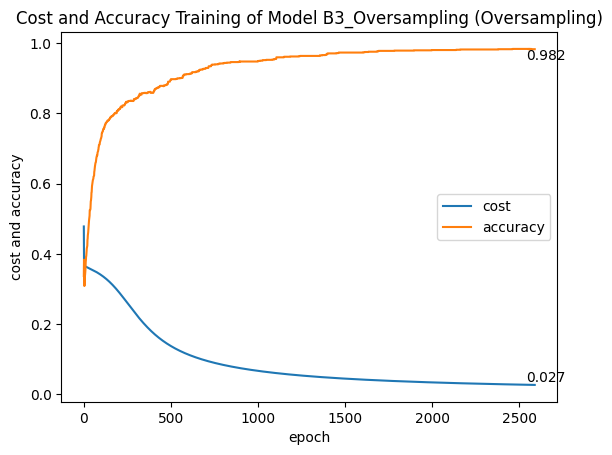

In [18]:
# plot the cost and accuracy in one graph
plt.plot(history_cost, label='cost')
plt.plot(history_acc, label='accuracy')
plt.text(len(history_cost) - 50, history_cost[-1] + 0.01, str(round(history_cost[-1], 3)))
plt.text(len(history_acc) - 50, history_acc[-1] - 0.03, str(round(history_acc[-1], 3)))
plt.xlabel('epoch')
plt.ylabel('cost and accuracy')
plt.title('Cost and Accuracy Training of Model ' + model_name + ' (Oversampling)')
plt.legend()

In [12]:
_, Z1, A1, Z2, A2 = myNN.forward(X_test_80_np_T)
predictions = np.argmax(A2, 0)

# calculate the accuracy
accuracy_test = np.mean(predictions == y_test_80)
print('Accuracy Testing of Model ' + model_name + ' :', accuracy_test)

# show in dataframe with prediction and actual value
import pandas as pd
df = pd.DataFrame({'prediction': predictions, 'actual': y_test_80})
print(df)

Accuracy Testing of Model B3_Oversampling : 0.8535031847133758
     prediction  actual
0             0       0
1             1       1
2             0       0
3             0       0
4             2       2
..          ...     ...
309           1       1
310           0       0
311           0       0
312           0       0
313           1       1

[314 rows x 2 columns]


In [20]:
# save the model and the cost and accuracy
file_name = 'NeuralNetwork_Model_' + model_name + '.pkl'
file_name_cost_acc = 'Cost_Accuracy_Model_' + model_name + '.csv'
with open(file_name, 'wb') as f:
    pickle.dump(myNN, f)

# make cost and accuracy as dataframe
cost_acc = pd.DataFrame({'cost': history_cost, 'accuracy': history_acc})
cost_acc.to_csv(file_name_cost_acc, index=False)

# Results


In [11]:
import pandas as pd
# load the model
file_name = 'NeuralNetwork_Model_' + model_name + '.pkl'
file_name_cost_acc = 'Cost_Accuracy_Model_' + model_name + '.csv'
with open(file_name, 'rb') as f:
    myNN = pickle.load(f)

# load the cost and accuracy
cost_acc = pd.read_csv(file_name_cost_acc)

In [13]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 80 : 20
conf_matrix = confusion_matrix(y_test_80, predictions)


Text(0.5, 1.0, 'Confusion Matrix of Model B3_Oversampling')

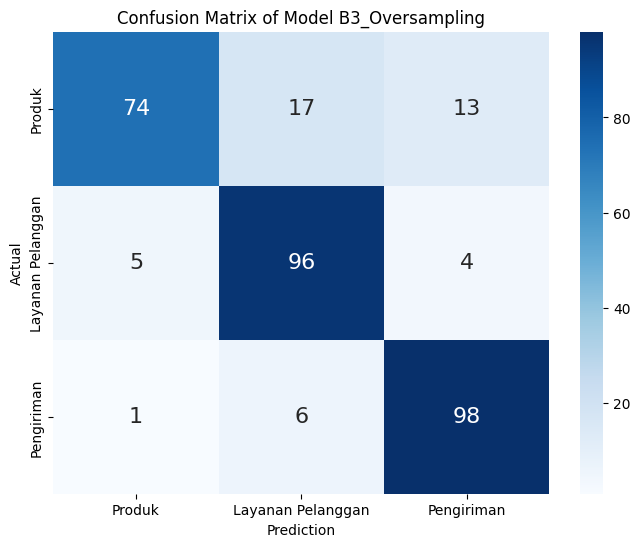

In [14]:
# plot the confusion matrix
import matplotlib.colors as mcolors

cat_code = {0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'}

# 80 : 20
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=cat_code.values(), yticklabels=cat_code.values(), cmap="Blues",
            annot_kws={"size": 16})
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Model ' + model_name)




In [15]:
# calculate the precision, recall, and F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_80, predictions, average=None)
recall = recall_score(y_test_80, predictions, average=None)
f1 = f1_score(y_test_80, predictions, average=None)


print('Accuracy  :', accuracy_test)
print('Precision :', precision)
print('Recall    :', recall)
print('F1        :', f1)



Accuracy  : 0.8535031847133758
Precision : [0.925      0.80672269 0.85217391]
Recall    : [0.71153846 0.91428571 0.93333333]
F1        : [0.80434783 0.85714286 0.89090909]


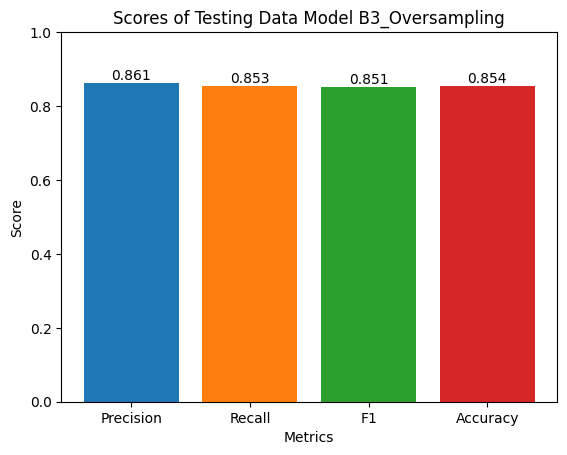

Scores of Testing Data Model B3_Oversampling
Precision  : 0.8612988673730362
Recall     : 0.853052503052503
F1         : 0.8507999247129683
Accuracy   : 0.8535031847133758


In [16]:
# plot each precision, recall, and F1 in one graph


# 80 : 20
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

plt.bar(['Precision'], [precision_avg])
plt.bar(['Recall'], [recall_avg])
plt.bar(['F1'], [f1_avg])
plt.bar(['Accuracy'], [accuracy_test])
plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.text( 'Precision', precision_avg + 0.01, str(round(precision_avg, 3)), ha='center')
plt.text('Recall', recall_avg + 0.01, str(round(recall_avg, 3)), ha='center')
plt.text('F1', f1_avg + 0.01, str(round(f1_avg, 3)), ha='center')
plt.text('Accuracy', accuracy_test + 0.01, str(round(accuracy_test, 3)), ha='center')
plt.title('Scores of Testing Data Model ' + model_name)
plt.show()
print('Scores of Testing Data Model ' + model_name)
print('Precision  :', precision_avg)
print('Recall     :', recall_avg)
print('F1         :', f1_avg)
print('Accuracy   :', accuracy_test)